In [ ]:
# importing dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.losses import *
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Question 1:
Using the MNIST dataset, create a deep learning model to classify the images containing numbers. Use batch normalisation and save the model using model checkpoints.


In [ ]:
# we will get the dataset from tf.keras.datasets
#load mnist data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [ ]:
X_train_full[:5000][1]#.shape#.reshape(-1, 28*28)/255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid = X_train_full[:5000] / 255.
X_train = X_train_full[5000:] / 255.
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

In [ ]:
X_train[20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

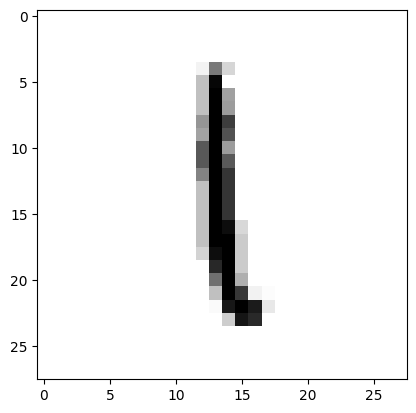

In [ ]:
# Lets view some data
plt.imshow(X_train[20], cmap="binary")
plt.show()

# Architechture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500"
height="300">

In [ ]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_8 (Batc  (None, 100)             

In [ ]:
# LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
# OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
# METRICS = ["accuracy"]

LOSS_FUNCTION = tf.losses.sparse_categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.experimental.SGD(0.02, momentum=0.9)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [ ]:
# introducing checkpointing
import os
if not os.path.isdir('/content/tmp'):
  os.mkdir('/content/tmp')

In [ ]:
checkpoint_filepath = '/content/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# training

EPOCHS = 5#30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[model_checkpoint_callback])

Epoch 1/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2171 - accuracy: 0.9328 - val_loss: 0.0998 - val_accuracy: 0.9716
Epoch 2/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1056 - accuracy: 0.9677 - val_loss: 0.0874 - val_accuracy: 0.9744
Epoch 3/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0784 - accuracy: 0.9751 - val_loss: 0.0823 - val_accuracy: 0.9778
Epoch 4/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0597 - accuracy: 0.9805 - val_loss: 0.0841 - val_accuracy: 0.9786
Epoch 5/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0500 - accuracy: 0.9833 - val_loss: 0.0779 - val_accuracy: 0.9802


In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model_clf.load_weights(checkpoint_filepath)

In [ ]:
# getting a history of training
pd.DataFrame(history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.217080,0.932800,0.099791,0.9716
1,0.105584,0.967727,0.087433,0.9744
2,0.078438,0.975145,0.082321,0.9778
3,0.059680,0.980509,0.084129,0.9786
4,0.049999,0.983309,0.077864,0.9802


<Axes: >

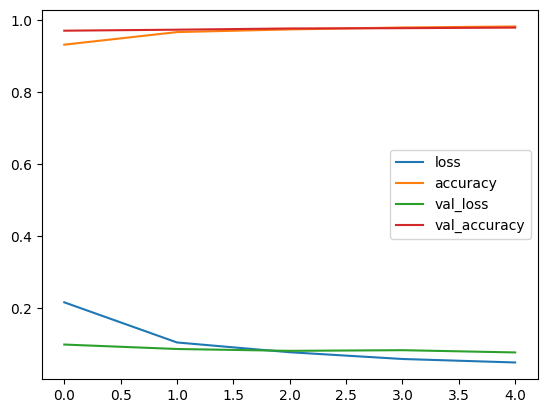

In [ ]:
# plotting history metrics
pd.DataFrame(history.history).plot()

In [ ]:
# making predictions on subset of data
x_new = X_test[:3]
actual = y_test[:3]
y_prob = model_clf.predict(x_new)
y_prob.round(3)
y_pred = np.argmax(y_prob, axis = -1)

1/1 [==============================] - 0s 112ms/step


In [ ]:
y_prob = model_clf.predict(x_new)
np.argmax(y_prob, axis=1)

1/1 [==============================] - 0s 26ms/step


array([7, 2, 1])

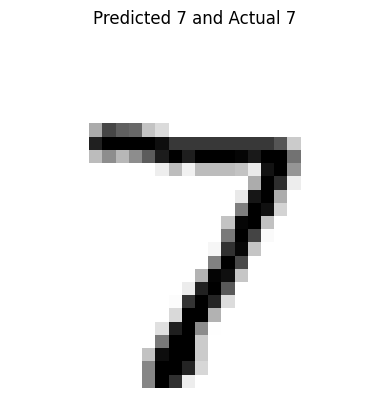

######################


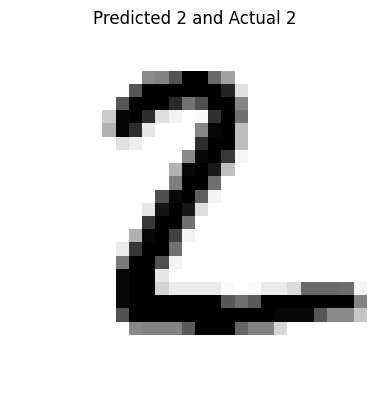

######################


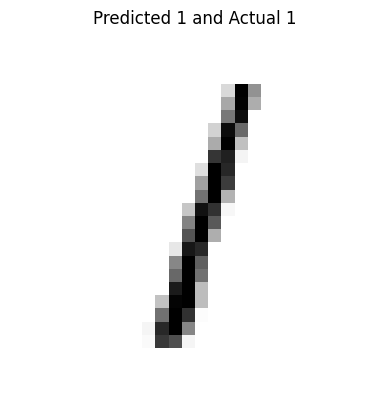

######################


In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")

# Question 2:
Using gradient tape, fit a regression line by updating weights.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Now, let’s define some of the learning parameters and hyperparameters that we will use along the way.

In [ ]:
data = pd.read_csv('sample_data/dataset.csv')[['x','y']]
X = data['x']
y = data['y']

In [ ]:
data['y']

0        3.523687
1        1.210559
2        1.671014
3        0.662696
4      -14.302416
          ...    
9995     2.905850
9996    -0.826395
9997    -7.739156
9998     5.621597
9999     1.254592
Name: y, Length: 10000, dtype: float64

Training samples: 8000
Test samples: 2000


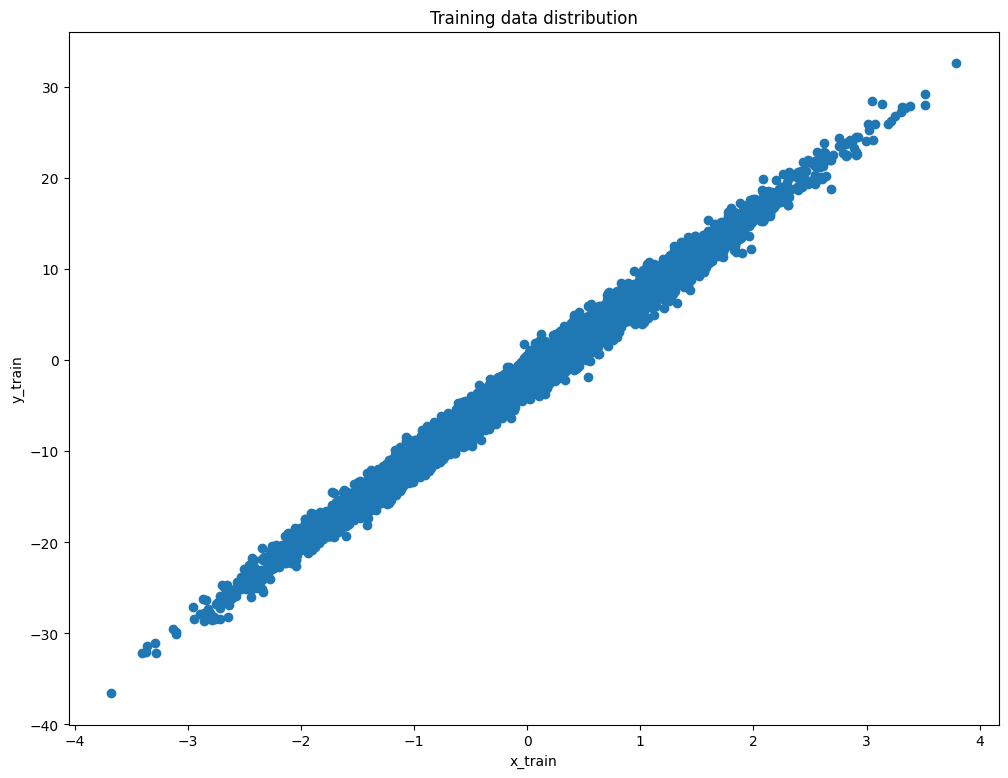

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
plt.figure(figsize=(12, 9))
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Training data distribution')
plt.savefig('training_data.jpg')

The next block contains the code for initializing random values for weight and bias.

In [ ]:
# random initial values for weights
# hat(y) = Wx + B
W = tf.Variable(np.random.randn())
B = tf.Variable(np.random.randn())
print(W)
print(B)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.5633299>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9497756>


# Few helper functions

In [ ]:
def pred(x, W, B):
    """
    calculate y_hat = m*x + c with learned weights and biases.
    y_hat is the prediction
    """
    y_hat = W*x + B
    return y_hat

In [ ]:
def loss(x, y, W, B):
    """
    Mean squared error loss function
    """
    prediction = pred(x, W, B)
    squared_error = tf.square(prediction - y)
    # finally calculate the MSE (Mean Sqaured Error)
    mse = tf.reduce_mean(squared_error)
    return mse

In [ ]:
def calculate_gradient(x, y, W, B):
    """
    Calculate the derivative of the loss
    """
    with tf.GradientTape() as tape:
        loss_value = loss(x, y, W, B)

    w_grad, b_grad = tape.gradient(loss_value, [W, B])

    return w_grad, b_grad

In [ ]:
prediction = pred(x_train, W, B)

In [ ]:
prediction

<tf.Tensor: shape=(8000,), dtype=float32, numpy=
array([-0.28303653, -0.2521285 , -0.37675422, ..., -0.43990856,
       -0.3127986 , -0.22318557], dtype=float32)>

In [ ]:
squared_error = tf.square(prediction - y_train)
tf.reduce_mean(squared_error)

<tf.Tensor: shape=(), dtype=float32, numpy=84.685394>

In [ ]:
# w_new = w_old - eta*grad_w(L)
# b_new = b_old - eta*grad_b(L)
learning_rate = 0.01

w_grad, b_grad = calculate_gradient(x_train, y_train, W, B)

print(w_grad)
print(b_grad)

dW, dB = w_grad * learning_rate, b_grad * learning_rate

print()
print(dW)
print(dB)

print(W.assign_sub(dW))
print(B.assign_sub(dB))

tf.Tensor(-18.153515, shape=(), dtype=float32)
tf.Tensor(3.3482609, shape=(), dtype=float32)

tf.Tensor(-0.18153514, shape=(), dtype=float32)
tf.Tensor(0.033482607, shape=(), dtype=float32)
<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.29395467>
<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-0.31516963>


In [ ]:
# w_grad, b_grad = calculate_gradient(x_train, y_train, W, B)
# w_grad

# Training

In [ ]:
num_epochs = 150
learning_rate = 0.01
for epoch in range(num_epochs):
    w_grad, b_grad = calculate_gradient(x_train, y_train, W, B)

    dW, dB = w_grad * learning_rate, b_grad * learning_rate

    W.assign_sub(dW)
    B.assign_sub(dB)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, loss {loss(x_train, y_train, W, B):.3f}")

Epoch: 0, loss 98.945
Epoch: 10, loss 65.957
Epoch: 20, loss 44.081
Epoch: 30, loss 29.573
Epoch: 40, loss 19.952
Epoch: 50, loss 13.571
Epoch: 60, loss 9.340
Epoch: 70, loss 6.533
Epoch: 80, loss 4.672
Epoch: 90, loss 3.438
Epoch: 100, loss 2.619
Epoch: 110, loss 2.076
Epoch: 120, loss 1.716
Epoch: 130, loss 1.477
Epoch: 140, loss 1.318


Checking final W and B values

In [ ]:
# check whether we get the desired `m` and `c` or not
print(f"Learned W: {W.numpy()}, learned B: {B.numpy()}")

Learned W: 8.579729080200195, learned B: -1.8428107500076294


# Checking on testing dataset

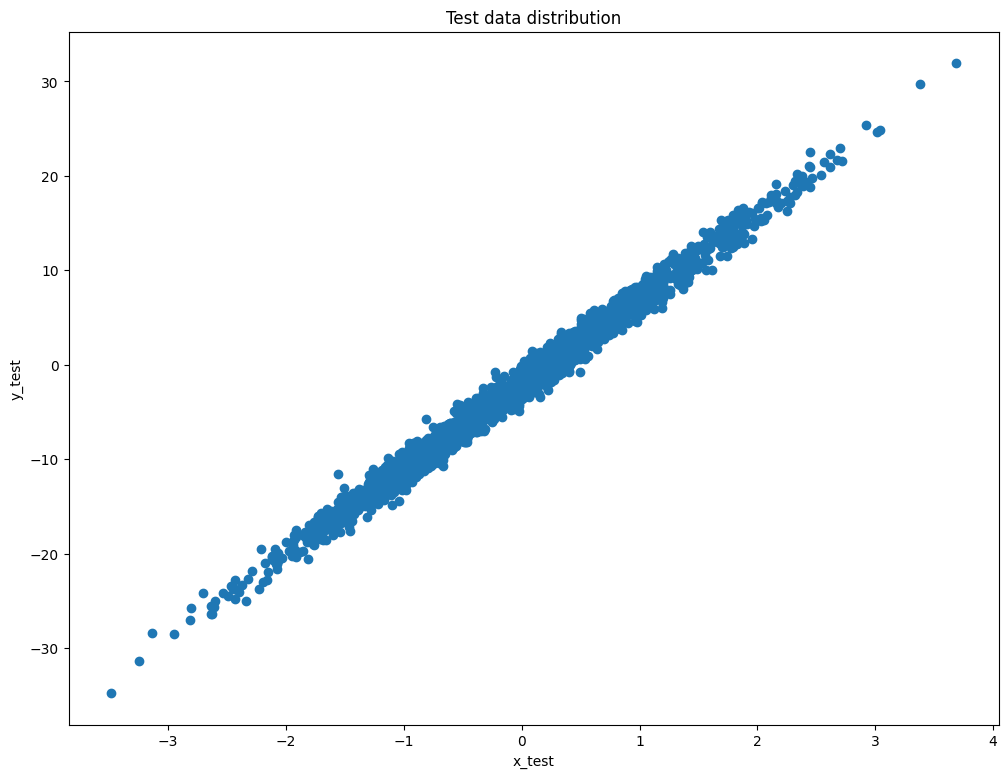

In [ ]:
# plot the test set
plt.figure(figsize=(12, 9))
plt.scatter(x_test, y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Test data distribution')
plt.savefig('test_data.jpg')

Let’s see what we get when trying to calculate the final loss on the test set.

In [ ]:
test_loss = loss(x_test, y_test, W, B)
print(f"Test loss: {test_loss:.3f}")

Test loss: 1.161


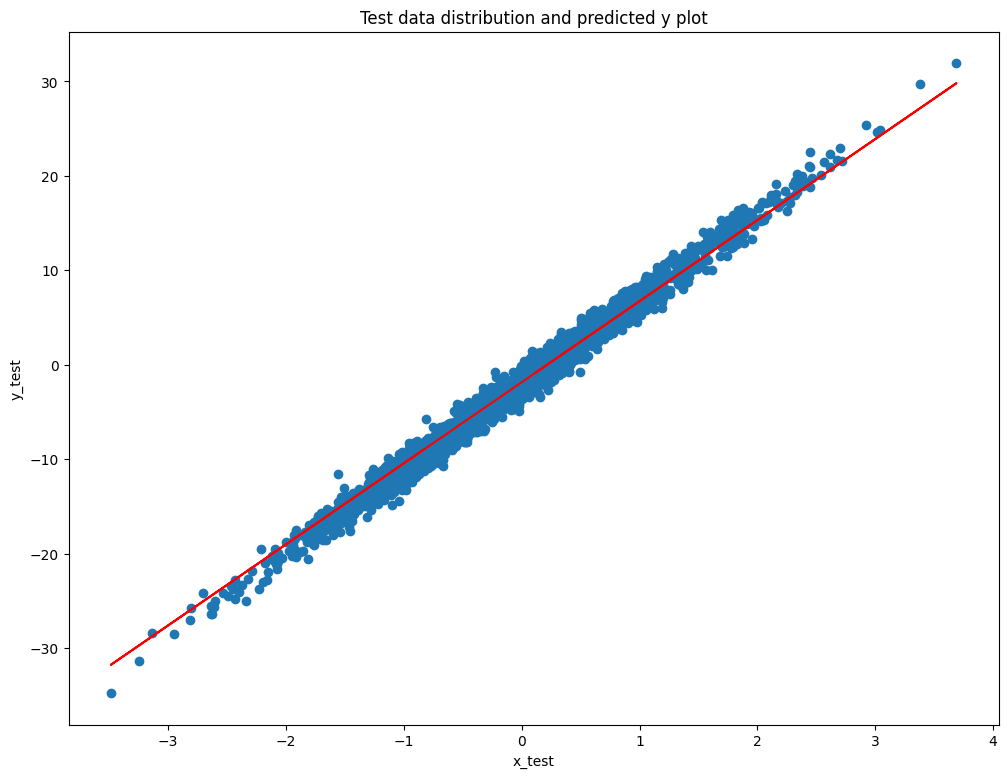

In [ ]:
# predicted y on on the test set
y_test_predicted = W.numpy()*x_test + B.numpy()
# plot the predicted y values on the test data distribution
plt.figure(figsize=(12, 9))
plt.plot(x_test, y_test_predicted, c='red')
plt.scatter(x_test, y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Test data distribution and predicted y plot')
plt.savefig('test_data_with_predicted_y_values.jpg')